In [31]:
import pandas as pd
import seaborn as sns

In [32]:
df = pd.read_csv("top-5000-youtube-channels.csv")
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [33]:
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  5000
Number of Columns:  6


###### convert the data to 2 dp

In [34]:
pd.options.display.float_format = '{:.2f}'.format

In [35]:
df.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


# Data cleaning

In [37]:
df.head(20)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


## Replace (--) with NaN

In [38]:
import numpy as np

In [39]:
df = df.replace('--', np.nan, regex=True)

In [40]:
df.head(20)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


# Check null values

In [41]:
df.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

### Percentage % of Data missing

In [42]:
perc_missing = df.isnull().sum() * 100 / len(df)
perc_missing

Rank            0.00
Grade           0.00
Channel name    0.00
Video Uploads   0.12
Subscribers     7.74
Video views     0.00
dtype: float64

<AxesSubplot:>

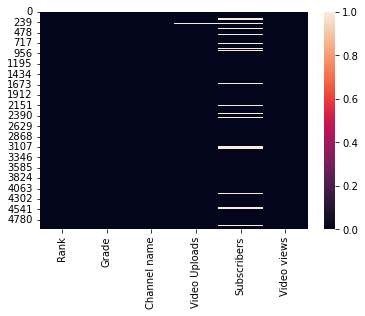

In [43]:
sns.heatmap(df.isnull())

## Drop Rows containing missing data

In [44]:
df.dropna(axis=1, inplace=True)

<AxesSubplot:>

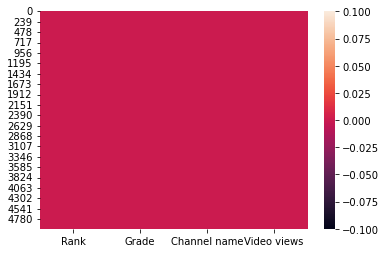

In [45]:
sns.heatmap(df.isnull())

# Data cleaning

In [46]:
df.head(4)

,Rank,Grade,Channel name,Video views
0,1st,A++,Zee TV,20869786591
1,2nd,A++,T-Series,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,9793305082
3,4th,A++,SET India,22675948293


In [47]:
df.tail(4)

,Rank,Grade,Channel name,Video views
4996,"4,997th",B+,HI-TECH MUSIC LTD,377331722
4997,"4,998th",B+,Mastersaint,311758426
4998,"4,999th",B+,Bruce McIntosh,14563764
4999,"5,000th",B+,SehatAQUA,73312511


### Clean the rank column

In [48]:
df.dtypes

Rank            object
Grade           object
Channel name    object
Video views      int64
dtype: object

In [49]:
df['Rank'] = df['Rank'].str[0:-2]

In [50]:
df.head()

,Rank,Grade,Channel name,Video views
0,1,A++,Zee TV,20869786591
1,2,A++,T-Series,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,9793305082
3,4,A++,SET India,22675948293
4,5,A++,WWE,26273668433


In [51]:
df.tail()

,Rank,Grade,Channel name,Video views
4995,"4,996",B+,Uras Benlioğlu,441202795
4996,"4,997",B+,HI-TECH MUSIC LTD,377331722
4997,"4,998",B+,Mastersaint,311758426
4998,"4,999",B+,Bruce McIntosh,14563764
4999,"5,000",B+,SehatAQUA,73312511


In [52]:
df['Rank'] = df['Rank'].str.replace(',','').astype('int')

In [53]:
df.dtypes

Rank             int32
Grade           object
Channel name    object
Video views      int64
dtype: object

In [54]:
df.tail()

,Rank,Grade,Channel name,Video views
4995,4996,B+,Uras Benlioğlu,441202795
4996,4997,B+,HI-TECH MUSIC LTD,377331722
4997,4998,B+,Mastersaint,311758426
4998,4999,B+,Bruce McIntosh,14563764
4999,5000,B+,SehatAQUA,73312511


In [55]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video views'], dtype='object')

# Data clean grade column

In [59]:
df['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', '\xa0 ', 'A- ', 'B+ '], dtype=object)

In [62]:
df['Grade'] = df['Grade'].map({'A++ ':6, 'A+ ':5, 'A ':4, '\xa0 ':3,'A- ':2,'B+ ':1})

In [63]:
df.head()

,Rank,Grade,Channel name,Video views
0,1,6,Zee TV,20869786591
1,2,6,T-Series,47548839843
2,3,6,Cocomelon - Nursery Rhymes,9793305082
3,4,6,SET India,22675948293
4,5,6,WWE,26273668433


In [65]:
df['Grade'] = df['Grade'].astype('int')

In [66]:
df.dtypes

Rank             int32
Grade            int32
Channel name    object
Video views      int64
dtype: object

# Average view for each channel

In [67]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video views'], dtype='object')

# Find correlation matrix

In [68]:
df.corr()

,Rank,Grade,Video views
Rank,1.00,-0.83,-0.39
Grade,-0.83,1.00,0.46
Video views,-0.39,0.46,1.00
